In [82]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# FORMATTING THE DATA

In [83]:
l0 = np.genfromtxt("l0.csv", delimiter=",", dtype=float)
l3 = np.genfromtxt("l3.csv", delimiter=",", dtype=float)

In [84]:
ln=len(l0)
for i in range(ln):
    if l0[ln-1-i]>19465*0.95 or l0[ln-1-i]<19465*0.05:
        l0 = np.delete(l0, ln-1-i)

ln=len(l3)
for i in range(ln):
    if l3[ln-1-i]>19465*0.95 or l3[ln-1-i]<19465*0.05:
        l3 = np.delete(l3, ln-1-i)

In [85]:
inter0=[] # dataset of vectors without interaction
inter1=[] # dataset of vectors with interaction

dataset1={}
dataset1['vectors']= np.genfromtxt("scaled-1_3-.csv", delimiter=",", dtype=float).reshape((200, 19465))
dataset1['bounds0']=l0
dataset1['bounds1']=l3

datasets=[dataset1]

In [86]:
def createdataset(datasets):
  inter0=[] # dataset of vectors without interaction
  inter1=[] # dataset of vectors with interaction
  for dataset in datasets:
    vectors = dataset['vectors']
    id0=dataset['bounds0']
    id1=dataset['bounds1']
    for x in id0:
      inter0.append(vectors[:,int(x)])
    for x in id1:
      inter1.append(vectors[:,int(x)])
  X=np.array(inter0+inter1)
  y=np.array([0]*len(inter0)+[1]*len(inter1))
  return X, y

In [87]:
X, y =createdataset(datasets)

# TRAINING

In [88]:
#Get your SVM set up using the SVC library. 
svm = SVC(C=1000, gamma='auto', kernel='poly', degree=2)

# K-FOLD CROSSVALIDATION

In [89]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, shuffle=True)

In [90]:
tot_correct_fraction_test = 0
tot_correct_fraction_train = 0
for train_index, test_index in kf.split(X):
  # creating training and testing datasets
	X_train = X[train_index]
	y_train = y[train_index]
	X_test = X[test_index]
	y_test = y[test_index]

  # fit the training dataset
	svm.fit(X_train,y_train)

	#use svm.predict() to predict the output for the test data set
	y_test_model = svm.predict(X_test)
 
	#loop through to compare the test data output to what it should be and obtain the fraction of correct classifications
	nTot = len(y_test) 
	nMatch = 0 
	for i in range(len(y_test)):
		if y_test[i] == y_test_model[i]:
			nMatch += 1

	correct_fraction_test = nMatch / nTot

	#do the same prediction and performance assessment performance with the training data
	y_train_model = svm.predict(X_train)

	nTot = len(y_train) 
	nMatch = 0
	for i in range(len(y_train)):
		if y_train[i] == y_train_model[i]:
			nMatch += 1

	correct_fraction_train = nMatch / nTot

	#add on to the totals
	tot_correct_fraction_test += correct_fraction_test
	tot_correct_fraction_train += correct_fraction_train

print('Correct percentage for test data: ', 100*tot_correct_fraction_test/5)
print('Correct percentage for training data: ', 100*tot_correct_fraction_train/5)

Correct percentage for test data:  99.75452873401403
Correct percentage for training data:  99.75881903123124


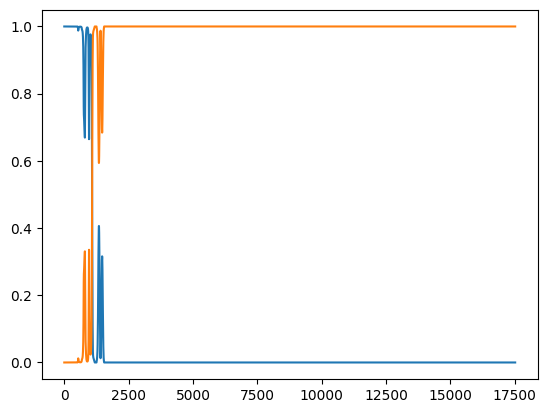

In [91]:
svm.probability=True
svm.fit(X,y)
prob = svm.predict_proba(X)
plt.plot(prob)